<p align="center">
  <img width="460" height="300" src="https://www.ecoles.com.tn/sites/default/files/universite/logo/ept_logo.jpg">
 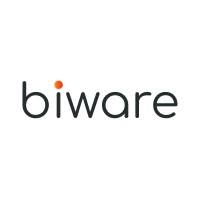
</p>
<h1><center>$$\underline{{\color{blue}{Ecole~Polytechnique~de~Tunisie}}}~~~~~~~~~~~~~~~~\underline{{\color{black}{Biware~Consulting}}}$$</center></h1>
<h2><center>$${\color{red}{\underline{Engineering~Internship:Part~2:BERT~implementation}}}$$</center></h2>
<h3><center>$$\large{{\color{green}{Subject:}}~\underline{Artificial~Emotional~Intelligence}}$$</center></h3>
<h3><center>$$This~work~is~done~by:~{\color{blue}{\underline{Sofien~Resifi}}}$$</center></h3>
<h3><center>$$Supervised~by:~{\color{blue}{\underline{Amine~Mahdi~Alila}
}}$$</center></h3>

In [1]:
import nltk
from IPython.display import clear_output  # This packages will help us to have a very clean code
nltk.download('stopwords')                # Stop words are meaningless words in a sentence
!pip install googletrans
nltk.download('punkt')
clear_output()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np#This packges is very necessary for dealing with arrays
import pandas as pd#This packages is necessarry when dealing with DataFrames
import matplotlib.pyplot as plt#This packages is useful for some plots
import seaborn as sns#This package is for ploting
from tqdm import tqdm#This package show us how are loop is doing
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder#This package is for encoding the target
from sklearn.model_selection import StratifiedKFold, KFold
import requests, zipfile, io#This package is useful for unziping a file 
import os
import sys
import logging
import string
import nltk
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer#This package
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from nltk import FreqDist, word_tokenize
from nltk import bigrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import googletrans                       #This package will be necessary for the translation
from googletrans import Translator       #This package is useful for the clearty of the code  
import re
import requests, zipfile, io  
clear_output()

# $data~correction$

In [4]:
train_to_clean=pd.read_csv("/content/drive/My Drive/My_latest_data")

In [5]:
train_to_clean.head()

,Sentiment,text
0,positvie,@bobbythomas1 have a good one kiddo... smile
1,positvie,@1indienation they's famed! haha
2,positvie,@aaroncarter7 hey Aaron whats going on? Met u ...
3,negative,"@charlieb81 On a serious point, I think a lot ..."
4,negative,&gt;&gt;&gt; @StoRmALiCiouS Ok iM Not Goin 2 M...


In [6]:
train_to_clean['text']=train_to_clean['text'].astype(str)

In [7]:
test_links = "#freedom OMG!!!!😭 yes the customer hasn't done anything, What shall we do??? https://t.co/HQjVfI1LF3"
def remove_links(text):
    text = re.sub(r'https?://\S+', '', text)    # Remove link
    text = re.sub(r'\n',' ', text)              # Remove line breaks
    text = re.sub(r'“',' ', text)
    text = re.sub('\s+', ' ', text).strip()     # Remove leading, trailing, and extra spaces
    return text
print("Original text: " + test_links)
print("Cleaned text: " + remove_links(test_links))

Original text: #freedom OMG!!!!😭 yes the customer hasn't done anything, What shall we do??? https://t.co/HQjVfI1LF3
Cleaned text: #freedom OMG!!!!😭 yes the customer hasn't done anything, What shall we do???


In [8]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
print("Original text: " + test_links)
print("Cleaned text: " + remove_punct(test_links))  

Original text: #freedom OMG!!!!😭 yes the customer hasn't done anything, What shall we do??? https://t.co/HQjVfI1LF3
Cleaned text: freedom OMG😭 yes the customer hasnt done anything What shall we do httpstcoHQjVfI1LF3


In [9]:
def remove_html(text):
    html = re.compile(r'<.*?>|’&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

In [10]:
text_emoji='I’m convinced that 😭😭😭 is the most expressive emoji combo Sad? 😭😭😭 Extremely happy? 😭😭😭 Proud? 😭😭😭 Emotional? 😭😭😭'
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
print("Original text: " + text_emoji)
print("Cleaned text: " + remove_emoji(text_emoji))  

Original text: I’m convinced that 😭😭😭 is the most expressive emoji combo Sad? 😭😭😭 Extremely happy? 😭😭😭 Proud? 😭😭😭 Emotional? 😭😭😭
Cleaned text: I’m convinced that  is the most expressive emoji combo Sad?  Extremely happy?  Proud?  Emotional? 


In [11]:
abbreviations = {"$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace","aamof" : "as a matter of fact", "acct" : "account",
    "adih" : "another day in hell","afaic" : "as far as i am concerned","afaict" : "as far as i can tell","afaik" : "as far as i know","afair" : "as far as i remember","afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications","asap" : "as soon as possible","asl" : "age, sex, location","atk" : "at the keyboard","ave." : "avenue","aymm" : "are you my mother","ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business","b2c" : "business to customer","b4" : "before",
    "b4n" : "bye for now","b@u" : "back at you","bae" : "before anyone else",
    "bak" : "back at keyboard","bbbg" : "bye bye be good", "bbc" : "british broadcasting corporation","bbias" : "be back in a second","bbl" : "be back later","bbs" : "be back soon","be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers","brt" : "be right there","bsaaw" : "big smile and a wink","btw" : "by the way","bwl" : "bursting with laughter","c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency","csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae","cwot" : "complete waste of time",
    "cya" : "see you","cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [12]:
text_abrev='Iam really zzz, I think that ygtr , w8 for me Iam coming '
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text
print("Original text: " + text_abrev)
print("Cleaned text: " + convert_abbrev_in_text(text_abrev))     

Original text: Iam really zzz, I think that ygtr , w8 for me Iam coming 
Cleaned text: Iam really sleeping bored and tired , I think that you got that right , wait for me Iam coming


In [13]:
contractions = { 
"ain`t": "am not",
"aren`t": "are not",
"can`t": "cannot",
"can`t`ve": "cannot have",
"'cause": "because",
"could`ve": "could have",
"couldn`t": "could not",
"couldn`t`ve": "could not have",
"didn`t": "did not",
"doesn`t": "does not",
"don`t": "do not",
"hadn`t": "had not",
"hadn`t`ve": "had not have",
"hasn`t": "has not",
"haven`t": "have not",
"he`d": "he would",
"he`d`ve": "he would have",
"he`ll": "he will",
"he`s": "he is",
"how`d": "how did",
"how`ll": "how will",
"how`s": "how is",
"i`d": "i would",
"i`ll": "i will",
"i`m": "i am",
"i`ve": "i have",
"isn`t": "is not",
"it`d": "it would",
"it`ll": "it will",
"it`s": "it is",
"let`s": "let us",
"ma`am": "madam",
"mayn`t": "may not",
"might`ve": "might have",
"mightn`t": "might not",
"must`ve": "must have",
"mustn`t": "must not",
"needn`t": "need not",
"oughtn`t": "ought not",
"shan`t": "shall not",
"sha`n`t": "shall not",
"she`d": "she would",
"she`ll": "she will",
"she`s": "she is",
"should`ve": "should have",
"shouldn`t": "should not",
"that`d": "that would",
"that`s": "that is",
"there`d": "there had",
"there`s": "there is",
"they`d": "they would",
"they`ll": "they will",
"they`re": "they are",
"they`ve": "they have",
"wasn`t": "was not",
"we`d": "we would",
"we`ll": "we will",
"we`re": "we are",
"we`ve": "we have",
"weren`t": "were not",
"what`ll": "what will",
"what`re": "what are",
"what`s": "what is",
"what`ve": "what have",
"where`d": "where did",
"where`s": "where is",
"who`ll": "who will",
"who`s": "who is",
"won`t": "will not",
"wouldn`t": "would not",
"you`d": "you would",
"you`ll": "you will",
"you`re": "you are",
"thx"   : "thanks"
}

In [14]:
text_concat='who`ll do the work, I wouldn`t do that, where`s he going ?'
def remove_contractions_word(chaine):
    return contractions[chaine.lower()] if chaine.lower() in contractions.keys() else chaine

def remove_contractions(text):
  word_list=[remove_contractions_word(i) for i in text.split()]
  return ' '.join([str(elem) for elem in word_list])

print("Original text: " + text_concat)
print("Cleaned text: " + remove_contractions(text_concat))     

Original text: who`ll do the work, I wouldn`t do that, where`s he going ?
Cleaned text: who will do the work, I would not do that, where is he going ?


In [15]:
def process_text(df):
  df['text'] = df['text'].apply(lambda x: remove_links(x))
  df['text'] = df['text'].apply(lambda x: remove_html(x))
  df['text'] = df['text'].apply(lambda x: remove_contractions(x))
  df['text'] = df['text'].apply(lambda x: convert_abbrev_in_text(x))
  df['text'] = df['text'].apply(lambda x: remove_emoji(x))
  df['text'] = df['text'].apply(lambda x: remove_punct(x))
  return df

In [17]:
test_to_clean=train_to_clean[190000:]
train_to_clean=train_to_clean[:190000]

In [20]:
Train= process_text(train_to_clean)
Test = process_text(test_to_clean)
clear_output()

In [ ]:
from collections import Counter
Train['temp_list'] = Train['text'].apply(lambda x:str(x).split())
Test['temp_list'] = Test['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in Train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,69048
1,I,58533
2,you,50346
3,to,42624
4,modi,42235
5,and,39233
6,for,30624
7,a,30225
8,i,26487
9,it,25375


In [ ]:
import plotly.express as px
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text with stop words', orientation='h', 
             width=1000, height=500,color='Common_words')
fig.show()

In [ ]:
LE=stopwords.words('english')
LE.remove("nor")
LE.append("I")

In [ ]:
def remove_stopword_enli(x):
  return [y for y in x if y not in LE +['modi','’']]

Train['temp_list'] = Train['temp_list'].apply(lambda x:remove_stopword_enli(x))   #Remvoing stop_words in Train data
Test['temp_list'] = Test['temp_list'].apply(lambda x:remove_stopword_enli(x))
def join_text(lis):
  return ' '.join([str(elem) for elem in lis])
Train['text']=Train['temp_list'].apply(join_text) 
Test['text']=Test['temp_list'].apply(join_text)

In [ ]:
Train.drop("temp_list",axis=1,inplace=True)
Test.drop("temp_list",axis=1,inplace=True)

# $\underline{tf~hub~BERT:From~google}$

In [ ]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.1MB 3.3MB/s 


In [ ]:
random_state_split = 21
Dropout_num = 0
learning_rate = 6e-6                      # You need to adjust these parameters 
valid = 0.2
epochs_num = 3
batch_size_num =30

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub
import tokenization

In [ ]:

def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    
    
    if Dropout_num == 0:
        # Without Dropout
        out = Dense(3, activation='softmax')(clf_output)
    else:
        # With Dropout(Dropout_num), Dropout_num > 0
        x = Dropout(Dropout_num)(clf_output)
        out = Dense(3, activation='softmax')(x)

    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy',f1_m])
    
    return model

In [ ]:
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
train_input = bert_encode(Train['text'].values, tokenizer, max_len=160)
test_input = bert_encode(Test['text'].values, tokenizer, max_len=160)

In [ ]:
lbl_enc = preprocessing.LabelEncoder()
target = lbl_enc.fit_transform(Train['Sentiment'].values)
train_labels=np_utils.to_categorical(target)

In [ ]:
model_BERT = build_model(bert_layer, max_len=160)
model_BERT.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

$\underline{{\color{blue}{\large \textbf{Training the model}}}}$

In [ ]:
checkpoint = ModelCheckpoint('model_BERT_new_new.h5', monitor='val_loss', save_best_only=True)

train_history = model_BERT.fit(
    train_input, train_labels,
    validation_split = 0.2,
    epochs = 3, # recomended 3-5 epochs
    callbacks=[checkpoint],
    batch_size = 16)

Epoch 1/3
7945/7945 [==============================] - 8005s 1s/step - loss: 0.3660 - accuracy: 0.8469 - f1_m: 0.8456 - val_loss: 0.2790 - val_accuracy: 0.9025 - val_f1_m: 0.9025
Epoch 2/3
7945/7945 [==============================] - 8002s 1s/step - loss: 0.1019 - accuracy: 0.9657 - f1_m: 0.9657 - val_loss: 0.2196 - val_accuracy: 0.9344 - val_f1_m: 0.9342
Epoch 3/3
7945/7945 [==============================] - 7932s 998ms/step - loss: 0.0214 - accuracy: 0.9933 - f1_m: 0.9933 - val_loss: 0.2985 - val_accuracy: 0.9352 - val_f1_m: 0.9351


In [ ]:
model_BERT.load_weights("/content/drive/My Drive/model_BERT_new_new.h5")

In [ ]:
y_test=lbl_enc.fit_transform(Test['Sentiment'].values)

In [ ]:
print("test errors")
predictions_test = model_BERT.predict(test_input)
pred_test=[list(predictions_test[i,:]).index(max(predictions_test[i,:])) for i in range(len(predictions_test))]

test errors


$\underline{{\color{blue}{\large \textbf{Evaluation}}}}$

In [ ]:
from sklearn.metrics import f1_score,accuracy_score
print ("f_1_score: " ,f1_score(y_test, np.array(pred_test),average='macro'))
print ("accuracy: %0.3f " % accuracy_score(y_test, np.array(pred_test)))

f_1_score:  0.9475712032734277
accuracy: 0.947 


In [ ]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.92      0.93      0.92      1382
     neutral       0.97      0.98      0.98      1312
    positive       0.95      0.93      0.94      1437

    accuracy                           0.95      4131
   macro avg       0.95      0.95      0.95      4131
weighted avg       0.95      0.95      0.95      4131



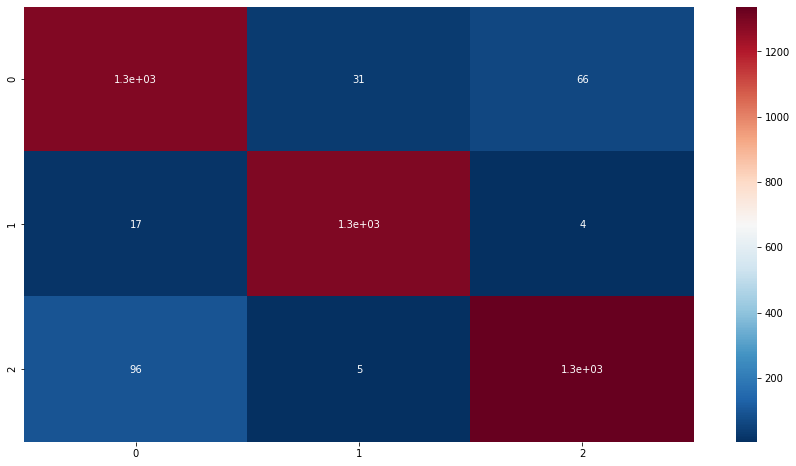

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred_test)), annot=True,cmap="RdBu_r")

# $\underline{DEMO}$

In [ ]:
sentence="oh my god it is so beautiful"

In [ ]:
ind=model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0].index(max(model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0]))
if ind==0.0:
  print("negative",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])
elif ind==1.0:
  print("neutral",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])
else :
  print("positive",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])

positive 0.7048360705375671


In [ ]:
sentence="I love you very much"

In [ ]:
ind=model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0].index(max(model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0]))
if ind==0.0:
  print("negative",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])
elif ind==1.0:
  print("neutral",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])
else :
  print("positive",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])

positive 0.6531526446342468


In [ ]:
sentence="Iam not statisfied with the work"

In [ ]:
ind=model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0].index(max(model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0]))
if ind==0.0:
  print("negative",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])
elif ind==1.0:
  print("neutral",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])
else :
  print("positive",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])

negative 0.9677550196647644


In [ ]:
sentence="I really appreciate this work"

In [ ]:
ind=model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0].index(max(model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0]))
if ind==0.0:
  print("negative",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])
elif ind==1.0:
  print("neutral",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])
else :
  print("positive",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])

positive 0.562057614326477


In [ ]:
sentence="talk all the nonsense and continue all the drama will vote for modi"

In [ ]:
ind=model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0].index(max(model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0]))
if ind==0.0:
  print("negative",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])
elif ind==1.0:
  print("neutral",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])
else :
  print("positive",model_BERT.predict(bert_encode([sentence], tokenizer, max_len=160)).tolist()[0][ind])

neutral 0.9970954656600952


# $Conclusion$

So here we can see that BERT is doing ver good 